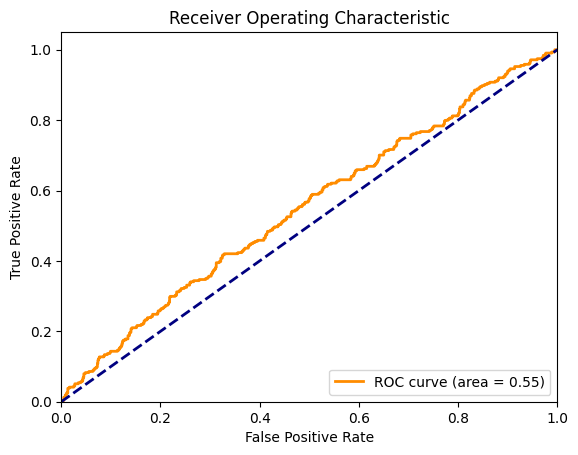

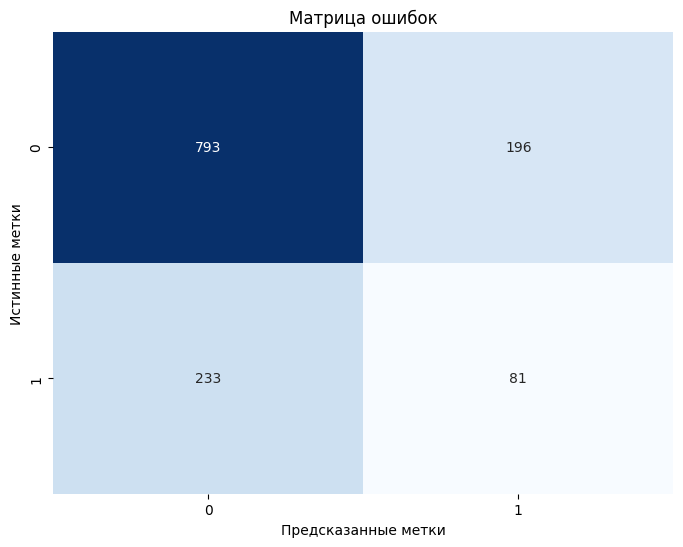

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# задача прогнозирования популярности песни на основе количества потоков

# Загрузка данных
df = pd.read_csv("spotify_top_songs_audio_features.csv")

# Определение признаков (X) и меток (y) для задачи прогнозирования популярности песни на основе количества потоков
X = df[['danceability', 'energy', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo']]
y = (df['streams'] > df['streams'].mean()).astype(int)  # Бинарное разделение: выше среднего - 1, ниже или равно - 0

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели наивного байесовского классификатора
model = GaussianNB()
model.fit(X_train, y_train)

# Получение вероятности принадлежности к классу "1" (выше среднего) для тестового набора
y_prob = model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой и ее AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Визуализация ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Предсказание меток для тестового набора
y_pred = model.predict(X_test)

# Создание матрицы ошибок
conf_mat = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()
